In [84]:
import dpkt
import csv
import matplotlib.pyplot as plt
f = open("networkslab3.pcap", "rb")
pcap  =  dpkt.pcap.Reader(f) 

In [85]:
rows = []
tslist = []
acklist = []
for ts, buf in pcap: 

    eth = dpkt.ethernet.Ethernet(buf) 

# This grabs the layer 3 (IP) object 
#  ... from inside the Ethernet frame 
# First we only want to consider IP packets 
#   ... there are likely some non-IP ethernet frames 
    
    if eth.type == dpkt.ethernet.ETH_TYPE_IP: 
        ip = eth.data 


# Now we check and see if the protocol inside the IP packet 
#  ... Is actually TCP 
    
    if ip == "40.126.29.12" and ip.p  ==  dpkt.ip.IP_PROTO_TCP: 
        tcp = ip.data 
    ack = tcp.ack
    tslist.append(ts)
    acklist.append(tcp.ack)
    rows.append([ts, tcp.ack])
    
# Here we can then do something with the  the TCP header

In [86]:
fields = ['timestamp', 'acknowledgement']
csvfile = "pcaps.csv"

with open(csvfile, "w") as f:
    writer = csv.writer(f)
    writer.writerow(fields)
    writer.writerows(rows)

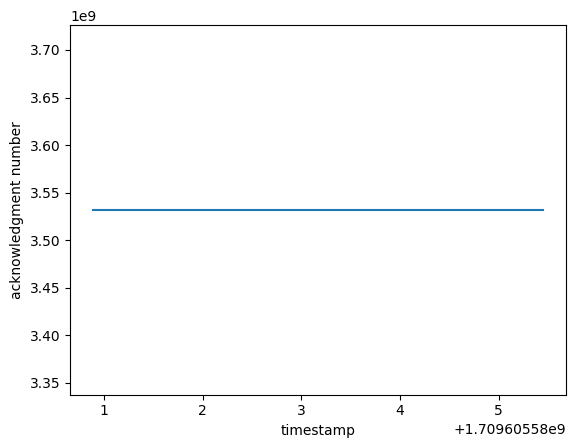

In [87]:
plt.plot(tslist, acklist, label='Loaded from file!')
plt.xlabel('timestamp')
plt.ylabel('acknowledgment number')
plt.show()